In [2]:
# Steps involved in building predictive model are

# 1. Prepare problem and load libraries
# 2. Summarize the data - statistics and visualization
# 3. Prepare data - Data cleaning, Data preprocessing and transformation
# 4. Evaluate Algorithms - Split data set into train and test
#                        - Spotcheck algorithms
#                        - Compare Algorithms
# 5. Improve Accuracy - Selected algorithm is implemented using Ensemble methods and hyper parameters are tuned
# 6. Finalize the Model - Prediction on Validation set
#                       - Train the algorithm on entire dataset
#                       - Save the model for later use

In [252]:
# To remove Warnings
import warnings
warnings.filterwarnings('ignore')

# Prepare Problem statement and load libraries

# Problem Statement: The given dataset has SepalLength, Width and Height and Species, The developed model should be able to
#                   Predict the species of Iris based on the new SepalLength, Width and Height.

# Load Libraries

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline 
from pickle import dump
from pickle import load
# Defining Variables

seed = 7
folds = 10
test_size = 0.20

head:     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa 

Statistics:                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


Number By Species:                   Id  SepalLengthCm  Sepal

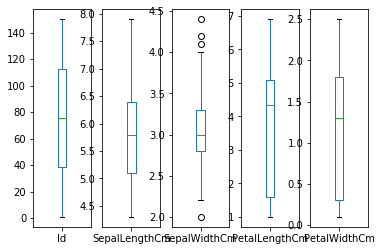

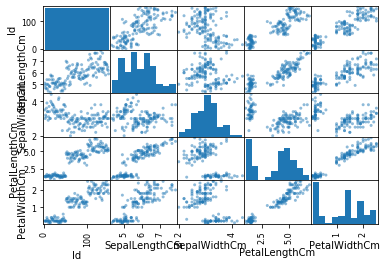

In [47]:
# load Data into a DataFrame 'df'

df = pd.read_csv('C:\\Users\\vardh\\Vardhan\\ED\\iris.csv')

# Summarize the data
print('head: ',df.head(2), '\n\nStatistics: ',df.describe())
print('\n\nNumber By Species: ', df.groupby(by ='Species').count())
print('\n\nNull Values in columns: ',df.isna().sum(axis=0))
print('\n\nNull Values in rows: ',df.isna().sum(axis=1))
# Visualize the data
df.plot(kind='box',subplots=True)
df.corr(method='pearson')
scatter_matrix(df)
plt.show()

In [85]:
# Data Cleaning - Finding Null values and removing them

# Finding Null values by columns - There are no Null Values 
print('\n\nNull values in Columns: ', df.isna().sum(axis=0))
print('\n\nNull values in Rows: ', df.isna().sum(axis=1))

# The ID column is insignificant in training and prediction hence it can be dropped
df = pd.read_csv('C:\\Users\\vardh\\Vardhan\\ED\\iris.csv')
df = df.drop(columns='Id')
df.head(5)

# Diving data into dependent and independent dataset (values and target(label))

X = df.iloc[:,0:4]
Y = df.iloc[:,-1]

# Data Preprocessing and Transformation - Since all the Data is numeric and two has normal distribution, Transform the
#                                         attributes into using Normalizer

normalizer = Normalizer()
fit_preprocess = normalizer.fit_transform(X)

new_data = fit_preprocess.mean(axis=0) # mean value by column
#print(new_data)

# Since there are four feature which are equally import no features are reduced but PCA is done on those 4 features

pca = PCA(n_components=4,random_state = seed)
fit_pca = pd.DataFrame(pca.fit_transform(X))



Null values in Columns:  SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Null values in Rows:  0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64


In [150]:
# Splitting the dataset into train and test and spot checking algorithms

X1 = X.iloc[0:146,:]
Y1 = Y.iloc[0:146]
validation_ind = X.iloc[146::,:]  #holding for validation and is not included in any training
validation_dep = Y.iloc[146::]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=test_size,random_state=seed)
kf = KFold(n_splits=folds,shuffle=True,random_state=seed)
# Algorithms
lr = LogisticRegression(max_iter=100,random_state=seed)
lda = LinearDiscriminantAnalysis()
nb = GaussianNB()
dtc = DecisionTreeClassifier(max_depth=100,random_state=7,criterion='gini')
svm = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=4)
models = [lr,lda,nb,dtc,svm,knn]
scores = []
names = ['LogisticRegression','LinearDiscriminantAnalysis','NaiveBayes','DecisionTreeClassifier','SVM','KNN']
for i in models:
    accuracy = cross_val_score(i,X1,Y1,cv=kf)
#print(accuracy.mean()*100)
    scores.append(accuracy.mean()*100)
Final_Scores = pd.DataFrame(scores,index=names)
Final_Scores.idxmax(axis=0),print()
print('Algorithm with maximum Accuracy:')
print(Final_Scores[Final_Scores.iloc[:,0] == Final_Scores.iloc[:,0].max()])
print(Y1.shape)


Algorithm with maximum Accuracy:
                                    0
LinearDiscriminantAnalysis  97.952381
(146,)


In [149]:
# From the above Spot Checking we got best Score for Linear Discriminant Analysis
# We are going to improve on this model

# Creating a pipeline to prevent data leakage
estimator = []
estimator.append(('preprocess',StandardScaler()))
estimator.append(('pca',PCA()))
estimator.append(('lda',LinearDiscriminantAnalysis()))
pipeline = Pipeline(estimator)
cross_val_score(pipeline,X1,Y1,cv=kf).mean()*100
# With preprocessing the accuracy has been reduced - There is no need for preprocessing

97.95238095238096

In [192]:
# Implementing Ensembles to check for improvements
bc = BaggingClassifier(base_estimator=lda,random_state=seed)
ada = AdaBoostClassifier(base_estimator = lr,n_estimators=100,learning_rate=0.8,random_state=seed)
sgb = GradientBoostingClassifier(n_estimators=100,random_state=seed)
vtg = VotingClassifier(models,voting='hard')
base_estimators = [bc,ada,sgb]
nam = ['BaggingClf','AdaBoost','GradientBoost']
ensemble_scores = []
for i in base_estimators:
    accuracy = cross_val_score(i,X,Y,cv=kf)
    ensemble_scores.append(accuracy.mean()*100)
ensemble_scores = pd.DataFrame(ensemble_scores,index=nam)
ensemble_scores[ensemble_scores.iloc[:,0] == ensemble_scores.iloc[:,0].max()]

,0
BaggingClf,98.0


In [253]:
#Based on the above analysis the LDA model is best fit max accuracy and doesn't need any preprocessing and ensembles
lda = LinearDiscriminantAnalysis()
final_model = lda.fit(X,Y)
new_data
print(new_data)
test_data = pd.read_csv('C:\\Users\\vardh\\Vardhan\\ED\\iris_test.csv')
test_data.head(5)
predictions = []
for index, row in test_data.iterrows():
        prediction = final_model.predict([row])
        predictions.append(prediction[0])
predictions              # will display predictions these predictions are true

[0.75162123 0.40477978 0.45495809 0.14096468]


['Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica']

In [255]:
# saving the model 
file_name = 'iris_classification_test.sav'
dump(final_model,open(file_name,'wb'))